In [1]:
# import packages
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

In [2]:
# Try to analysis Iris dataset
# load the dataset
iris = load_iris()

In [3]:
#iris

In [4]:
X,y = iris.data, iris.target

In [5]:
# >>>>==== ====== ======== =====  Q1 ==== ====== ======== =====<<<<
# Question1 :Calculate the statistics (mean and standard deviation) of the four explanatory
#     variables: sepal length, sepal width, petal length and petal width.

# we convert the iris.data(an array)to pandas DataFrame so that we can easily manipulate
df_iris1 = pd.DataFrame(iris.data)
df_iris2 = pd.DataFrame(iris.target)

In [6]:
# using describe() to show the summary statistic
# actually you can also see some information under the iris.data
# 0:'sepal_length(cm)', 1:'sepal_width(cm)', 2:'petal_length(cm)', 3:'petal_width(cm)'
df_iris1.describe()

# Answer:
#sepal length, sepal width, petal length and petal width
#mean	5.843333	3.057333	3.758000	1.199333
#std	0.828066	0.435866	1.765298	0.762238

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df_iris1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
# >>>>==== ====== ======== =====  Q2 ==== ====== ======== =====<<<<
# Question2: How many examples of each class are there?
# Answer: we can see the description below the iris.data, is totally 150 examples and 50 for each type of iris

In [9]:
df_iris2.value_counts()

0    50
1    50
2    50
dtype: int64

In [10]:
# import packages
from sklearn.model_selection import train_test_split
# specify the train_test_split 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

In [11]:
# create the DecisionTreeClassifier and build the DecisionTreeClassifier using traning data
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# plot the decision tree
# filled: When set to True, paint nodes to indicate majority class for classification, 
# extremity of values for regression, or purity of node for multi-output.

In [13]:
def display_decisionTree(a):
    # filled: When set to True, paint nodes to indicate majority class for classification, 
    # extremity of values for regression, or purity of node for multi-output.
    plt.figure(figsize = (10,10))
    tree.plot_tree(a, filled= True)
    plt.show()    
    
    # export the graph to iris.dot file
    with open("tree_iris.dot", 'w') as f:
        f = tree.export_graphviz(clf, out_file=f, filled=True)

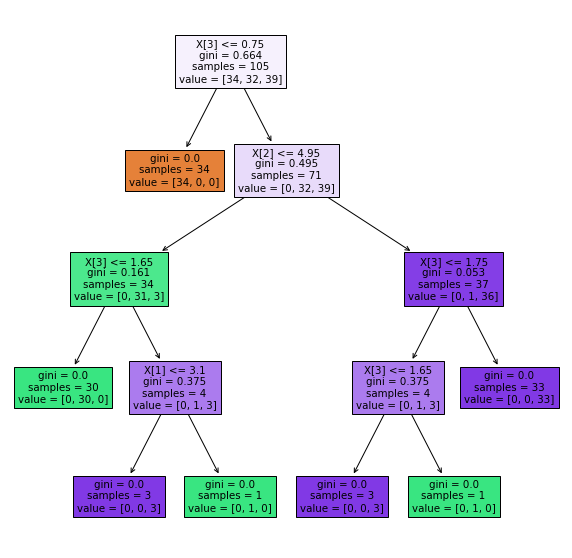

In [14]:
display_decisionTree(clf)

In [15]:
# predict 
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [16]:
# see the error rate
clf.score(X_test, y_test)*100

97.77777777777777

In [17]:
clf.score(X_train, y_train)*100

100.0

In [18]:
#cross_val_score(clf, X_test, y_test, cv = 3)
#cross_val_score(clf, X_test, y_test, cv = 3).mean()

In [19]:
#from sklearn.model_selection import cross_validate
#results = cross_validate(clf, X_test, y_test)
#results['test_score'].mean()*100

In [20]:
# >>>>==== ====== ======== =====  Q3 ==== ====== ======== =====<<<<
# Q3: Change the max_depth and min_samples_leaf parameter values. What do you notice?

# specific different max_depth, min_samples_leaf parameter DecisionTreeClassifier
clf2 = tree.DecisionTreeClassifier(max_depth=1)
clf3 = tree.DecisionTreeClassifier(max_depth=3)
clf4 = tree.DecisionTreeClassifier(min_samples_leaf=1)
clf5 = tree.DecisionTreeClassifier(min_samples_leaf=5)
clf6 = tree.DecisionTreeClassifier(min_samples_leaf=35)
clf7 = tree.DecisionTreeClassifier(min_samples_leaf=51)


# bulid the classifer
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)
clf7.fit(X_train, y_train)

# present tthe score of each classifer
print("max_depth = 1 : " + str(clf2.score(X_test,y_test)))
print("max_depth = 3 : " + str(clf3.score(X_test,y_test)))
print("min_samples_leaf = 1 : " + str(clf4.score(X_test,y_test)))
print("min_samples_leaf = 5 : " + str(clf5.score(X_test,y_test)))
print("min_samples_leaf = 35 : " + str(clf6.score(X_test,y_test)))
print("min_samples_leaf = 51 : " + str(clf7.score(X_test,y_test)))

max_depth = 1 : 0.6
max_depth = 3 : 0.9777777777777777
min_samples_leaf = 1 : 0.9777777777777777
min_samples_leaf = 5 : 0.9111111111111111
min_samples_leaf = 35 : 0.7555555555555555
min_samples_leaf = 51 : 0.6


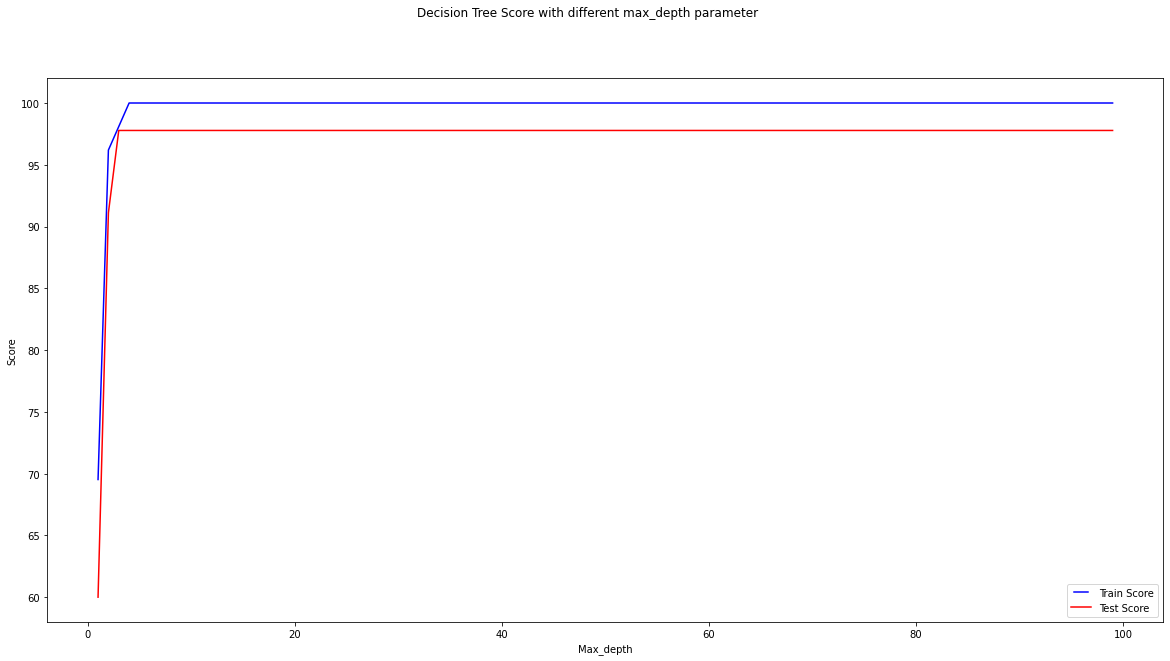

In [21]:
max_depths = np.arange(1, 100)
train_results = []
test_results = []

for i in max_depths:
    clfi = DecisionTreeClassifier(max_depth=i)
    clfi.fit(X_train, y_train)
    
    train_score = clfi.score(X_train,y_train)*100
    train_results.append(train_score)
    
    test_score = clfi.score(X_test,y_test)*100
    test_results.append(test_score)

plt.figure(figsize = (20,10))
line1, = plt.plot(max_depths, train_results, 'b', label="Train Score")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.suptitle("Decision Tree Score with different max_depth parameter")
plt.ylabel("Score")
plt.xlabel("Max_depth")
plt.show()

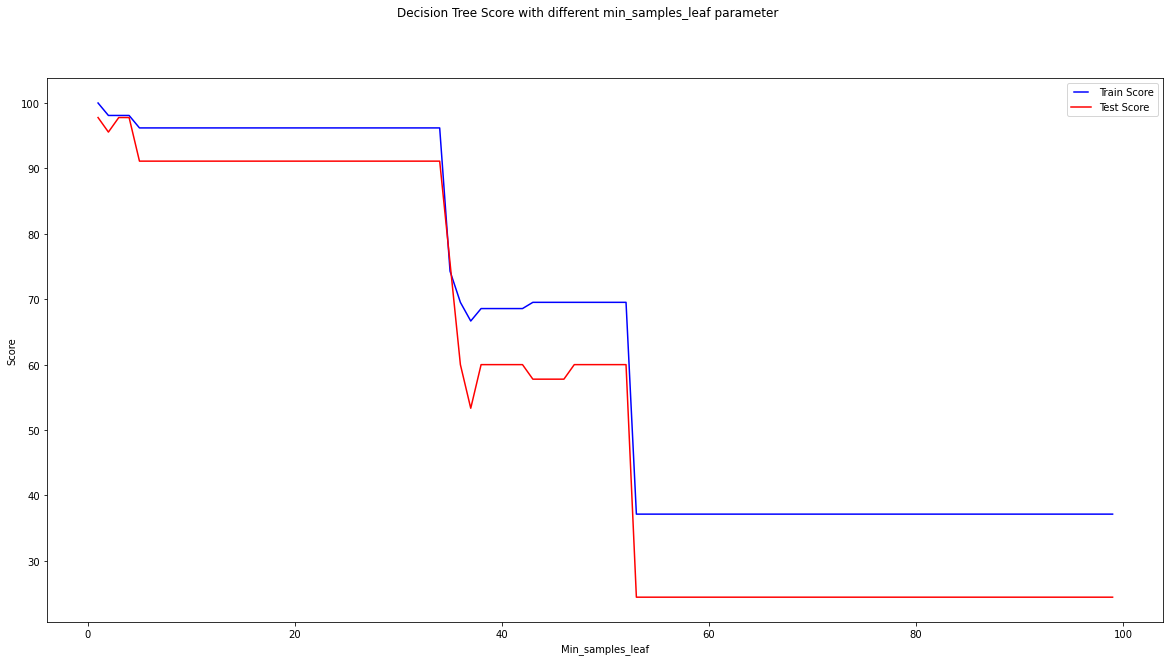

In [22]:
min_samples_leafs = np.arange(1, 100)
train_results = []
test_results = []

for i in min_samples_leafs:
    clfi = tree.DecisionTreeClassifier(min_samples_leaf=i)
    clfi.fit(X_train, y_train)
    
    train_score = clfi.score(X_train,y_train)*100
    train_results.append(train_score)
    
    test_score = clfi.score(X_test,y_test)*100
    test_results.append(test_score)
    
plt.figure(figsize = (20,10))
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train Score")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.suptitle("Decision Tree Score with different min_samples_leaf parameter")
plt.ylabel("Score")
plt.xlabel("Min_samples_leaf")
plt.show()


In [23]:
# >>>>==== ====== ======== =====  Q4 ==== ====== ======== =====<<<<
# Question 4: The problem here being particularly simple, redo a training/test division with
# 5% of the data in training and 95% test. Calculate the rate of misclassified items on the test
# set. Vary (or better, perform a grid search with GridSearchCV) the values of the max_depth
# and min_samples_leaf parameters to measure their impact on this score.

# split the training_test split into 5% and 95%
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size = 0.05, random_state = 0)
# create and build classifier
clf_5percent = tree.DecisionTreeClassifier()
clf_5percent.fit(X2_train, y2_train)
# predict and score
clf_5percent.score(X2_test,y2_test)*100

# Answer, when split to 5% to train and 95% percent to test, the accurate rate drop from 97% to 60%

70.62937062937063

In [24]:
# one thing I notice that is the score is not static,maybe is the random_state parameter, it change often, 
# so I decide to calculate the mean
sum_mean_5percent = 0
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.05, random_state = 0)
    # create and build classifier
    clf_5percent = tree.DecisionTreeClassifier()
    clf_5percent.fit(X_train, y_train)
    # predict and score
    sum_mean_5percent += clf_5percent.score(X2_test,y2_test)
print(sum_mean_5percent)

78.79720279720289


In [25]:
# GridSearchCV
# Exhaustive search over specified parameter values for an estimator.
# Important members are fit, predict.
# GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, 
# “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.
# The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over 
# a parameter grid.

# create the parameter dictionary
param_dist = {
    #'criterion':['gini','entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50,60,70,80,90,100],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50,60,70,80,90,100]
}
# import gridsearchcv

from sklearn.model_selection import GridSearchCV
# crate a object from GridSearchCV class, n_job = number of jobs run in parallel, -1 using all processors. 
# cv = cross validation splitting stratege
#GS = GridSearchCV(clf, param_grid=param_dist, cv = 3 , n_jobs=-1)
GS = GridSearchCV(DecisionTreeClassifier(), param_grid=param_dist, cv = 3, n_jobs=-1)

In [26]:
# fit the GS object
GS.fit(X_train,y_train)

/Users/yaolai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50, 60, 70, 80, 90, 100],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 30, 40, 50, 60, 70, 80, 90,
                                              100]})

In [27]:
#GS.cv_results_

In [28]:
GS.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [29]:
GS.best_score_

0.8888888888888888

In [30]:
GS.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

In [31]:
# >>>>==== ====== ======== =====  Q5 ==== ====== ======== =====<<<<
# Display of the decision surface
# Question 5: Redo the display for the other pairs of attributes. On which pair is the
#             separation between the classes the most marked?


# define a function :  create decision surface plot by passing a pair of features
def display_decisionSurface(a,b):
    
    # settings
    n_classes = 3
    plot_colors = 'bry'
    plot_step = 0.02
    plt.figure(figsize = (10,10))

    # choose attribute
    pair1 = [a,b]

    # set X,y
    X_q5 = iris.data[:, pair1]
    y_q5 = iris.target

    # tree learning
    clf_q5 = tree.DecisionTreeClassifier().fit(X_q5,y_q5)

    # Display the decision surface
    x_min, x_max = X_q5[:, 0].min() - 1, X_q5[:, 0].max() + 1
    y_min, y_max = X_q5[:, 1].min() - 1, X_q5[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,y_max, plot_step))
    Z = clf_q5.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.xlabel(iris.feature_names[pair1[0]])
    plt.ylabel(iris.feature_names[pair1[1]])
    plt.axis("tight")

    # Display of learning points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X_q5[idx, 0], X_q5[idx, 1], c=color,
    label=iris.target_names[i], cmap=plt.cm.Paired)
    plt.axis("tight")
    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend()
    plt.show()

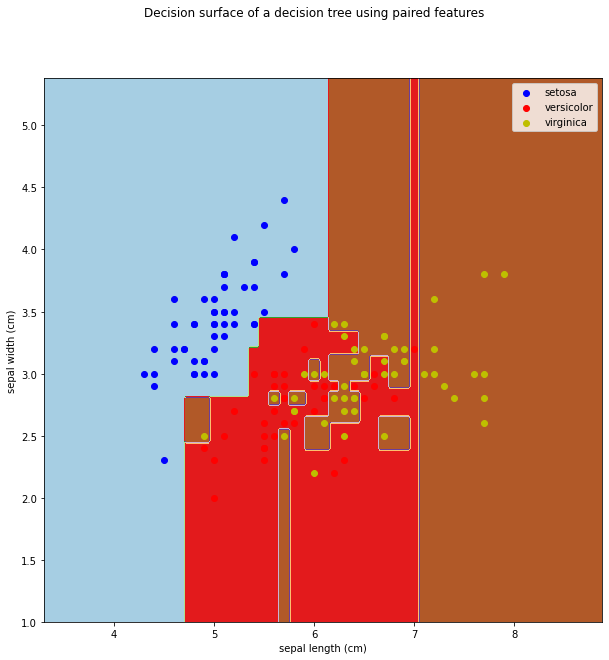

In [32]:
# call the display_decisionSurface function and decide which pair is most seperate
# 1. sepal_length and sepal_width 0,1
display_decisionSurface(0,1)

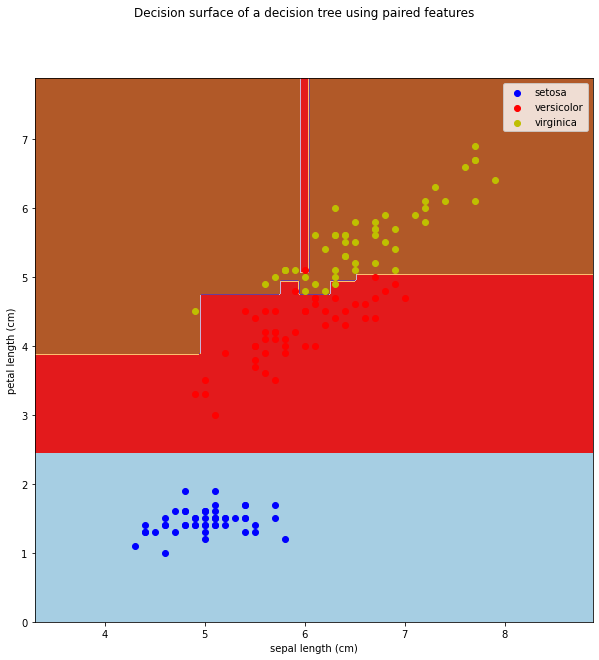

In [33]:
# sepal_length and petal_length 0,2
display_decisionSurface(0,2)

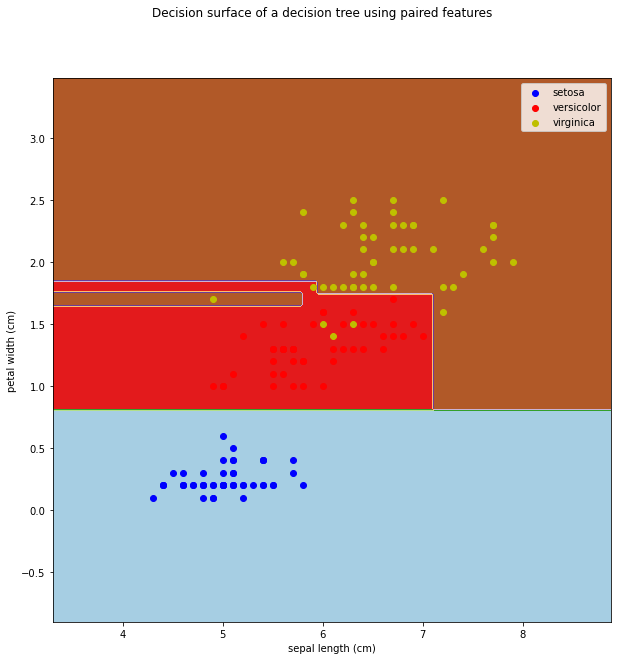

In [34]:
# sepal_length and petal_width 0,3
display_decisionSurface(0,3)

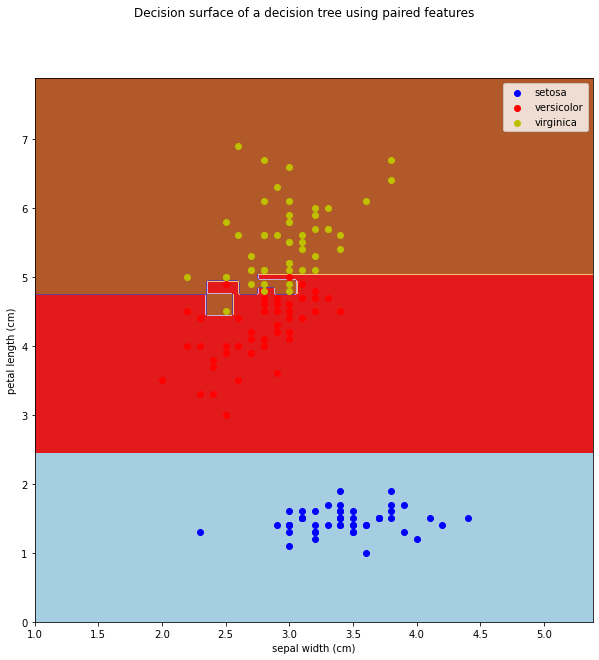

In [35]:
# sepal_width and petal_length 1,2
display_decisionSurface(1,2)

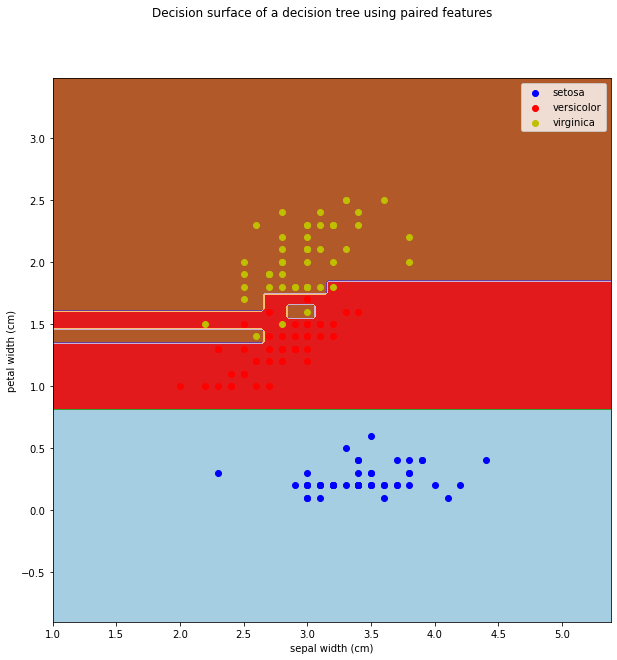

In [36]:
# sepal_width and petal_width 1,3
display_decisionSurface(1,3)

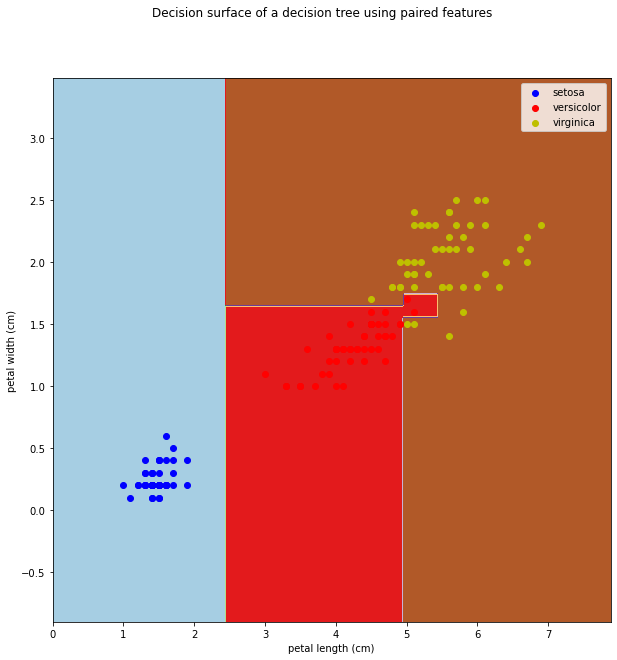

In [37]:
# petal_length and petal_width 2,3
display_decisionSurface(2,3)

In [38]:
# Answer: from the graphs above, I would say is the pair of sepal_width and petal_length 1,2

In [39]:
# >>>>==== ====== ======== =====  Q6 ==== ====== ======== =====<<<<
# Question 6: Change the value of the max_depth parameter. What happens if we take too
#             large a value? Too small? Change the rate of elements affected by noise (the y[::5]). When
#             all elements are affected by noise, should a high or low value for max_depth be preferred?

# import packages
from sklearn.tree import DecisionTreeRegressor

Text(0.5, 1.0, 'Noise Sin Wave')

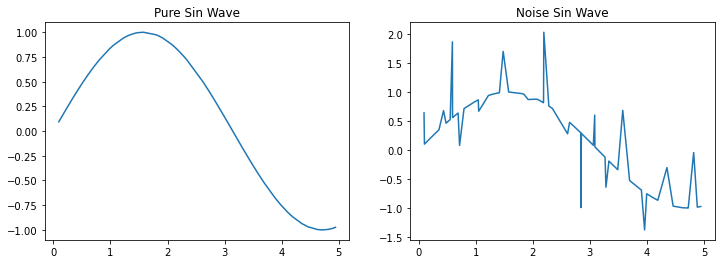

In [40]:
# Regression example

# create the training data, X_RE = X + Regression Example
np.random.seed(0)
X_RE = np.sort(5 * np.random.rand(80, 1), axis=0)
y_RE = np.sin(X_RE).ravel()

fig = plt.figure(figsize=(12,4))
fig.add_subplot(121)
plt.plot(X_RE,y_RE)
plt.title('Pure Sin Wave')

# add random noise every 5 samples
y_RE[::5] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X_RE,y_RE)
plt.title('Noise Sin Wave')

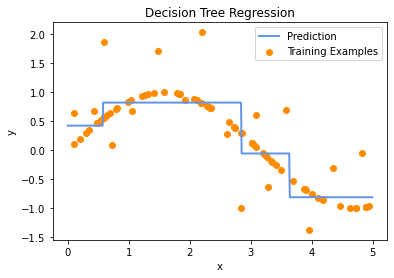

In [41]:
# Regression example continue...
# Learn the model, reg_E = regression Example
reg_E = DecisionTreeRegressor(max_depth=2)
reg_E.fit(X_RE,y_RE)

# Prediction on the same range of values
X_RE_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_RE_pred = reg_E.predict(X_RE_test)

# Display of the result
plt.figure()
plt.scatter(X_RE, y_RE, c="darkorange", label="Training Examples")
plt.plot(X_RE_test, y_RE_pred, color="cornflowerblue", label="Prediction",linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [42]:
# Define a general function so we can easily making change of parameter
# DTRD stands for DecisionTreeRegressor Display
# x[::2] every 2 element [0,2,4,6], x[1::2] every other element, starting at index 1 [1,3,5,7]

def DTRD(depth, noise_step):
    # create the training data, X_RE = X + Regression Example
    np.random.seed(0)
    X_RE = np.sort(5 * np.random.rand(80, 1), axis=0)
    y_RE = np.sin(X_RE).ravel()

    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(121)
    plt.plot(X_RE,y_RE)
    plt.title('Pure Sin Wave')

    # add random noise every 5 samples
    r = int(80 / noise_step)
    y_RE[::noise_step] += 3 * (0.5 - np.random.rand(r))
    fig.add_subplot(122)
    plt.plot(X_RE,y_RE)
    plt.title('Noise Sin Wave')
    # Regression example continue...
    # Learn the model, reg_E = regression Example
    reg_E = DecisionTreeRegressor(max_depth = depth)
    reg_E.fit(X_RE,y_RE)

    # Prediction on the same range of values
    X_RE_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_RE_pred = reg_E.predict(X_RE_test)
    
    # Display of the result
    plt.figure()
    plt.scatter(X_RE, y_RE, c="darkorange", label="Training Examples")
    plt.plot(X_RE_test, y_RE_pred, color="cornflowerblue", label="Prediction",linewidth=2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

In [43]:
print(type(y_RE))

<class 'numpy.ndarray'>


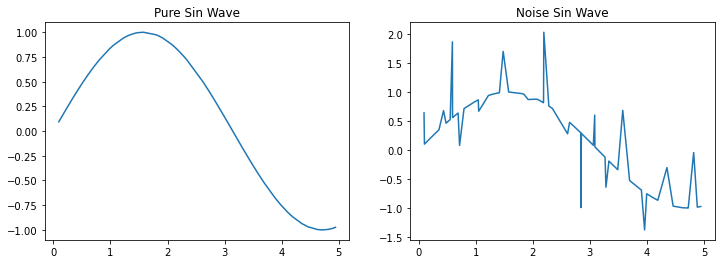

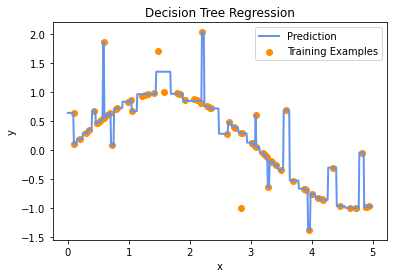

In [44]:
# change the max_depth and rate of elements affected by noise
# 1. large max_depth
DTRD(10,5)
# Answer: if max_depth is large, the regresson function seems over-fitting

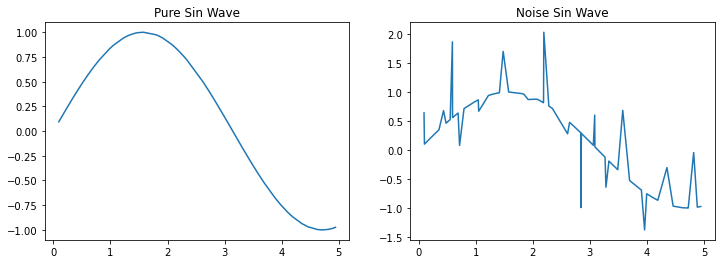

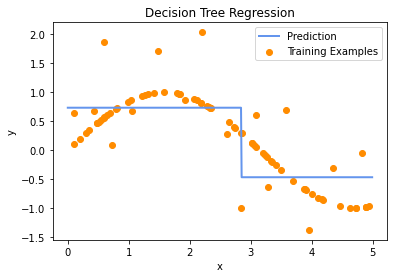

In [45]:
# 2. small max_depth
DTRD(1,5)
# Answer: if the max_depth is small, the regresson function is not smooth

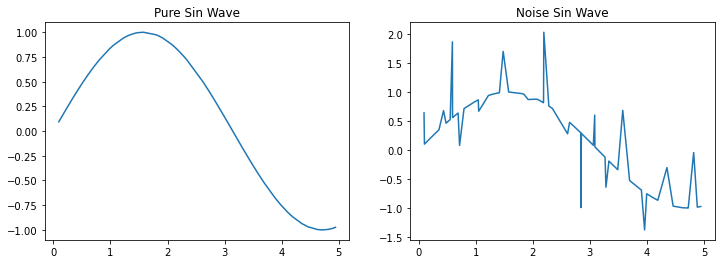

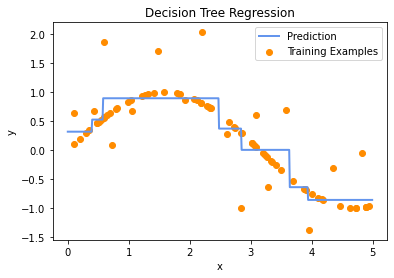

In [46]:
DTRD(3,5)

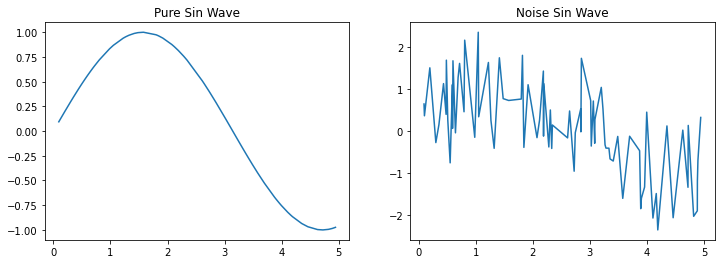

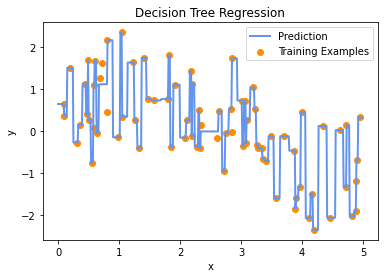

In [47]:
# let all the elements affected by noise
# 3. large max_depth with frequent noise
DTRD(10,1)

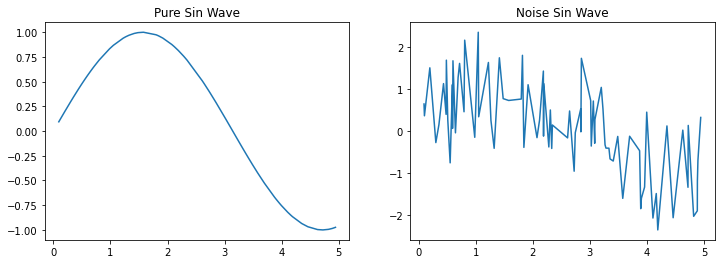

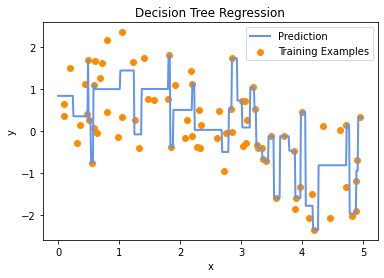

In [48]:
DTRD(6,1)

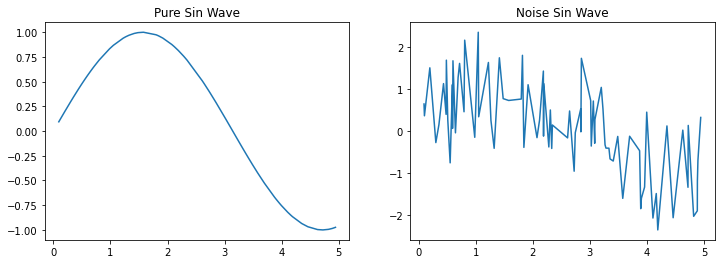

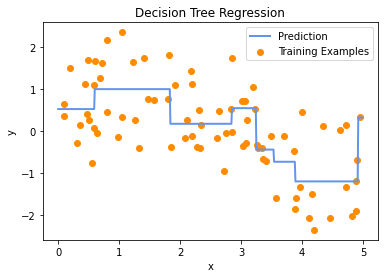

In [49]:
DTRD(3,1)

In [50]:
# Answer: when a high frequent noise appear, I think the low max_depth is preferred

In [51]:
# >>>>==== ====== ======== =====  Q7 ==== ====== ======== =====<<<<
# Question 7: To deepen, load the Diabetes dataset from the sklearn.datasets module and
# make a random partition into learning part and test part (70% learning, 30% testing). Build
# a regression tree model on this basis. Calculate the root mean square error on the test set.
# Do a grid search to find the max_depth parameter value that minimizes this error.

# load the database
import sklearn.datasets
diabetes = sklearn.datasets.load_diabetes()

In [52]:
# load diabetes.data and diabetes.target
print(type(diabetes))
X_d = diabetes.data
y_d = diabetes.target

# convert the format to pandas dataFrame
df_diabetes1 = pd.DataFrame(X_d)
df_diabetes2 = pd.DataFrame(y_d)

<class 'sklearn.utils.Bunch'>


In [53]:
#diabetes

In [54]:
df_diabetes1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [55]:
df_diabetes2.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, train_size=0.7, random_state=42)

In [57]:
dt = DecisionTreeRegressor()

In [58]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [59]:
y_predict = dt.predict(X_test)

In [60]:
y_predict

array([197., 198., 197., 310., 139., 230., 233., 236., 116., 128., 158.,
       200., 143., 277.,  88., 210., 245., 279., 277., 173., 144., 139.,
        49., 173.,  85., 109., 288.,  81.,  59., 104., 200.,  49., 220.,
       262., 192., 180.,  93., 104.,  66.,  96.,  59., 118., 219., 185.,
       190.,  75.,  31.,  65.,  59., 151.,  85.,  75., 147., 179., 292.,
        78.,  71., 281.,  53.,  77., 164., 276., 141., 179.,  97., 265.,
       292., 170., 150., 126., 161., 198., 248., 214.,  96., 185., 150.,
       225., 178., 259.,  49.,  88.,  53.,  81.,  63.,  52., 143.,  42.,
       142., 163.,  64., 296.,  40.,  63.,  72., 198., 242., 145., 144.,
        75., 212., 178., 275., 185., 128., 185.,  91.,  81., 128., 265.,
        88., 202., 190., 268., 111., 126.,  83., 200., 143., 128., 235.,
       183.,  84., 235.,  49., 198., 196., 219.,  81., 185., 253.,  65.,
       259.])

In [61]:
mean_err = mean_absolute_error(y_test, y_predict)
mean_err

61.00751879699248

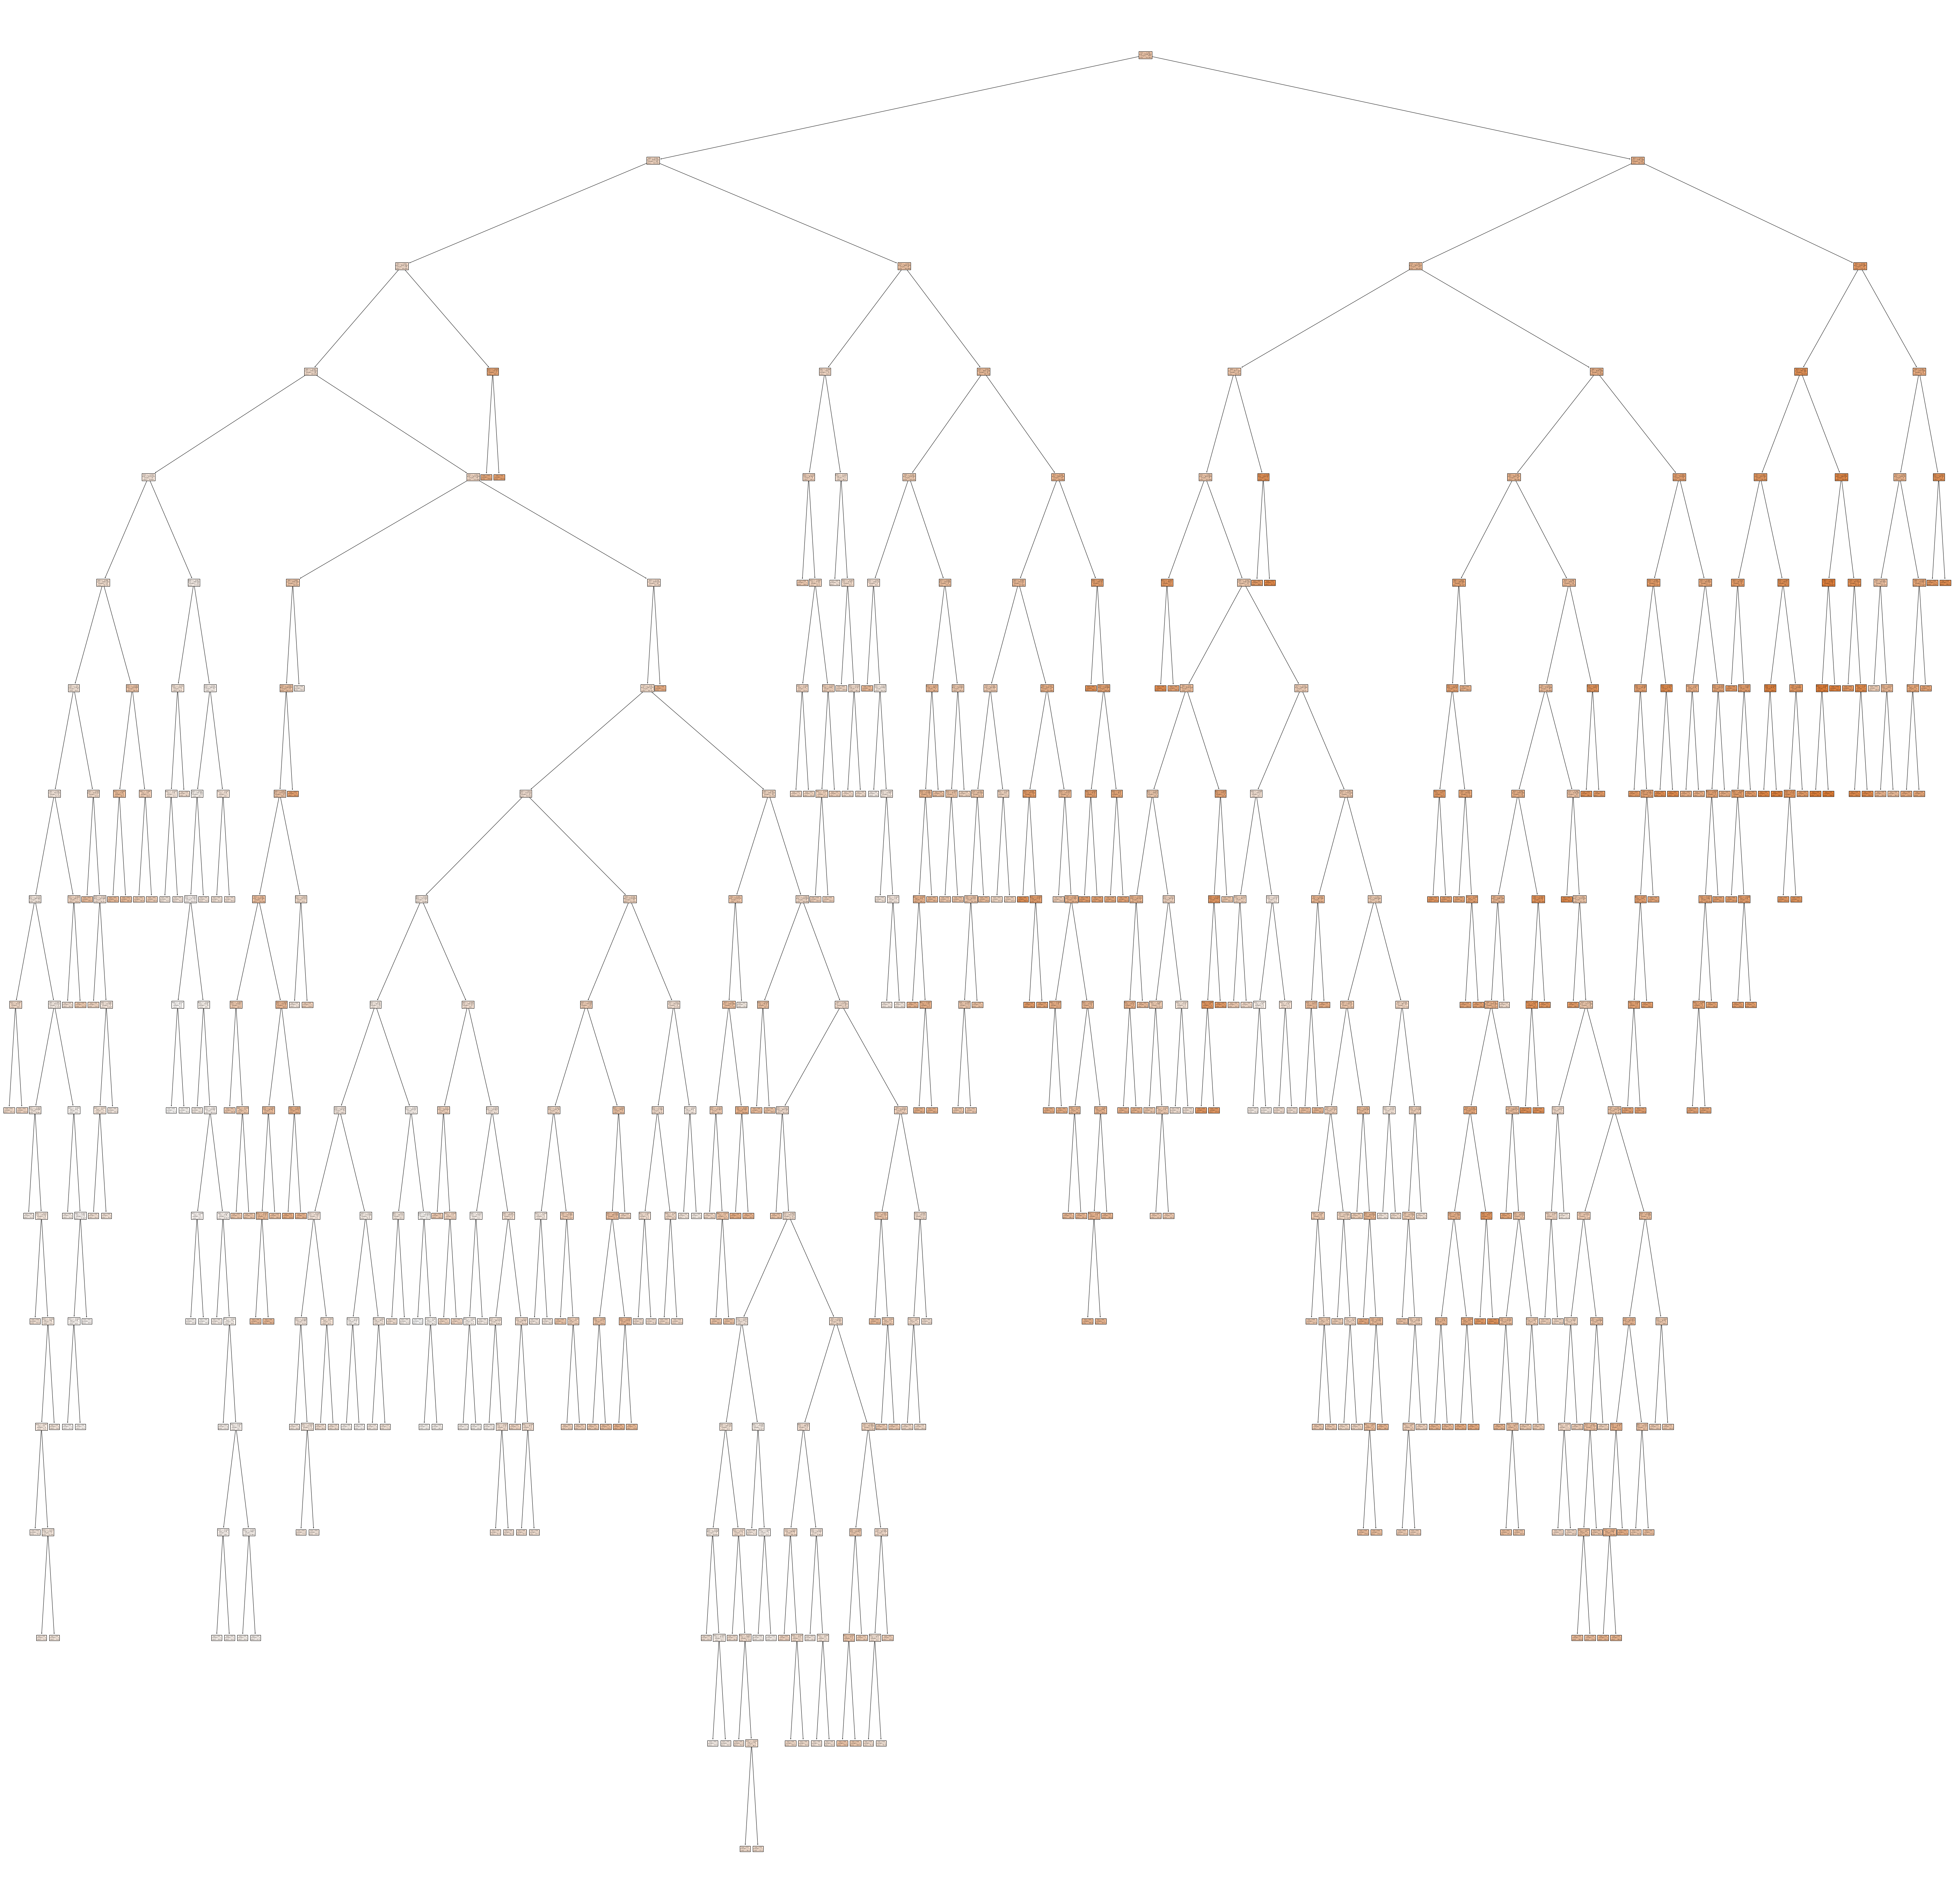

In [62]:
plt.figure(figsize = (100,100))
tree.plot_tree(dt, filled= True)
plt.show() 
    
# export the graph to iris.dot file
with open("tree_diabetes.dot", 'w') as f:
    f = tree.export_graphviz(dt, out_file=f, filled=True)

In [63]:
# create the parameter dictionary
param_dist_d = {
    #'criterion':['gini','entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50,60,70,80,90,100],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,40,50,60,70,80,90,100]
}
# crate a object from GridSearchCV class, n_job = number of jobs run in parallel, -1 using all processors. 
# cv = cross validation splitting stratege
GS_d = GridSearchCV(dt, param_grid=param_dist_d, cv = 5, n_jobs=-1)

In [64]:
GS_d.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50, 60, 70, 80, 90, 100],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]})

In [65]:
GS_d.best_params_

{'max_depth': 4, 'min_samples_leaf': 25}

In [66]:
GS_d.best_score_

0.36060504411658567

In [67]:
from sklearn.metrics import mean_squared_error
import math

In [68]:
MSE = mean_squared_error(y_test, y_predict)
RMSE = math.sqrt(MSE)
print("Root mean square on the test set = " + str(RMSE))

Root mean square on the test set = 77.87419969054969
